In [1]:
import numpy as np
from matplotlib import pyplot as plt
import os  
import glob
import sys 
import pygsp
from importlib import reload

sys.path.append("/home/localadmin/Bureau/HUGO/repositories/gsp_neuro/gsp_neuro")
import data_loading as dload
reload(dload)
import plotting as plot

In [2]:
data_base_dir = "/home/localadmin/Bureau/HUGO/data/BIOPSYCHO_CTRLS/"
subject_ids_lut = "/home/localadmin/Bureau/HUGO/Ids.csv"

In [3]:
subject_ids = [sub.get('subjID') for sub in dload.get_ids_csv(subject_ids_lut)]
subject_folders = [subfolder for subfolder in glob.glob(data_base_dir + "sub-*") if subfolder[-8:] in subject_ids]

subjects_with_data = [folder[-8:] for folder in glob.glob(data_base_dir + "sub-*")]

print("These subjects were not found in the data directory : {}".format([sub for sub in subject_ids if sub not in subjects_with_data]))

These subjects were not found in the data directory : ['CHUVL340', 'CHUVL342', 'CHUVL364']


In [4]:
mysub_folder = subject_folders[0]
print("Current subject folder : " + mysub_folder)
connectome_paths = dload.get_sub_connectomes_paths(mysub_folder)

Current subject folder : /home/localadmin/Bureau/HUGO/data/BIOPSYCHO_CTRLS/sub-CHUVL435


In [5]:
scale = 4
df_coords = dload.read_coords(scale=scale)
rois2keep = list(df_coords[df_coords["Structures Names"].str.contains('ctx')].index)
G = pygsp.graphs.Graph(dload.load_connectome(connectome_paths[scale-1]),lap_type='normalized')
G.set_coordinates(kind=df_coords[['XCoord(mm)','YCoord(mm)','ZCoord(mm)']].to_numpy())


Succesfully loaded a connectome with 506 nodes.


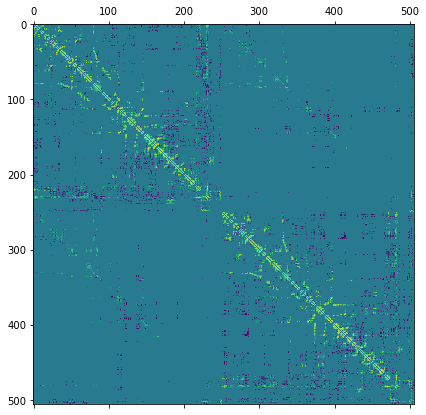

In [6]:
plt.figure(figsize=(7,7))
plt.matshow(np.log(G.W.todense(), out=np.zeros_like(G.W.todense()), where=(G.W.todense()!=0)), fignum=0)

In [7]:
G = G.subgraph(rois2keep)

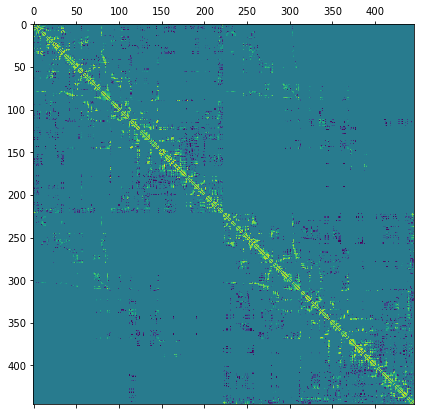

In [8]:
A = G.W.todense()
plt.figure(figsize=(7,7))
plt.matshow(np.log(A, out=np.zeros_like(A), where=(A!=0)), fignum=0)

In [9]:
G.is_connected()

True

In [10]:
G.compute_fourier_basis()

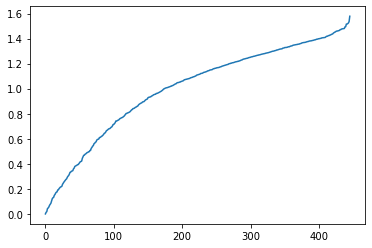

In [11]:
plt.plot(G.e)

(<Figure size 432x288 with 2 Axes>,
 <Axes3DSubplot:title={'center':'Graph(n_vertices=446, n_edges=10026)'}>)

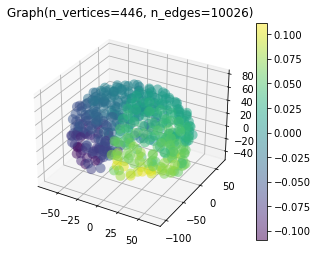

In [12]:
G.plot(G.U[:,1], edges=False)

In [14]:
G.coords


array([[ 19.1775  ,  15.02675 , -22.2699  ],
       [ 32.1884  ,  25.2444  ,  -7.89526 ],
       [ 33.4482  ,  25.55653 , -19.8924  ],
       ...,
       [-39.2723  ,  -2.441964, -12.0446  ],
       [-37.3987  ,  11.53315 ,  -7.87544 ],
       [-33.0586  ,  15.76954 ,   4.91287 ]])